In [2]:
from datascience import *
import matplotlib
from path_data_variable import *
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

# Scatter Plots + Line Graphs <- Tables

Skip to hund_rounding and numerical_labels

The table `actors` contains data on Hollywood actors, both male and female. The columns are:

| Column        | Contents |
|---------------------|----------|
|`Actor`              | Name of actor |
|`Total Gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `Number of Movies`  | The number of movies the actor has been in |
| `Average per Movie` | Total gross divided by number of movies |
| `#1 Movie`          | The highest grossing movie the actor has been in |
| `Gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In the calculation of the gross receipt, the data tabulators did not include movies where an actor had a cameo role or a speaking role that did not involve much screen time.

The table has 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `Total Gross`, so it is easy to see that Harrison Ford is the highest grossing actor. At the time when the table was created, his movies had brought in more money at the domestic box office than the movies of any other actor in the table.

In [3]:
actors = Table.read_table(path_data + 'actors.csv')
actors.show(3)

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9



### **Variable** = "attribute" = "feature"

# <h2>Scatter Plots</h2>

A *scatter plot* displays the relation between two numerical variables. You saw an example of a scatter plot in an early section where we looked at the number of periods and number of characters in two classic novels.

The Table method `scatter` draws a scatter plot consisting of one point for each row of the table. Its first argument is the label of the column to be plotted on the horizontal axis, and its second argument is the label of the column on the vertical.

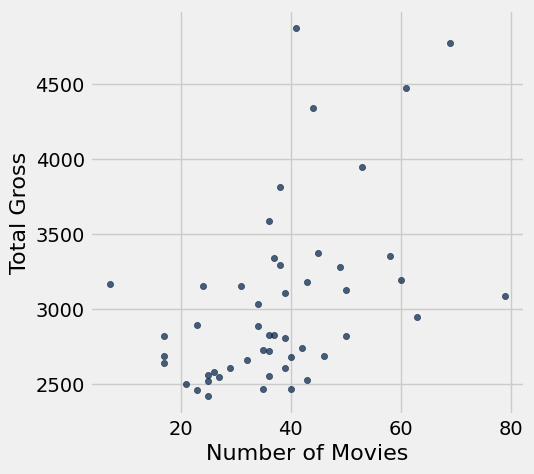

In [4]:
actors.scatter('Number of Movies', 'Total Gross')

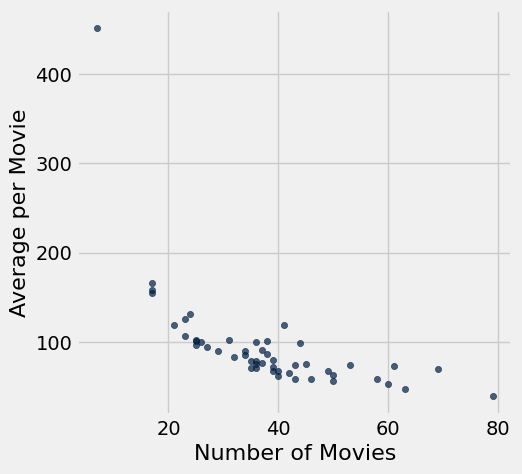

In [5]:
actors.scatter('Number of Movies', 'Average per Movie')

## Scatter plot workshop

| Column        | Contents |
|---------------------|----------|
|`Actor`              | Name of actor |
|`Total Gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `Number of Movies`  | The number of movies the actor has been in |
| `Average per Movie` | Total gross divided by number of movies |
| `#1 Movie`          | The highest grossing movie the actor has been in |
| `Gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In [6]:
actors.show(3)

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9


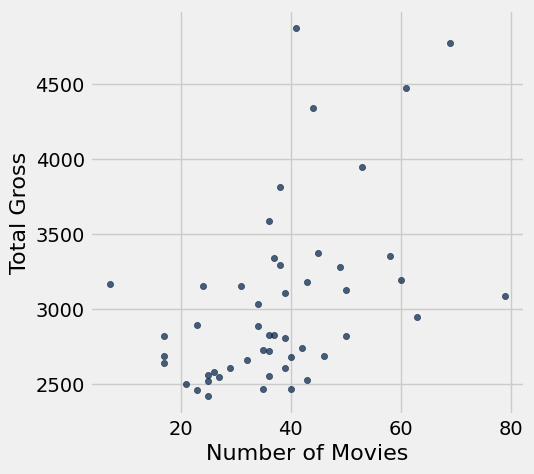

In [7]:
# actors.scatter("Number Of Movies") 
 # ValueError: The column 'Actor' contains non-numerical values. A plot cannot be drawn for this column.
  # It selected 1st column
  
# Works:
# actors.scatter("Number of Movies", "Total Gross")
actors.scatter(column_for_x="Number of Movies", select="Total Gross")


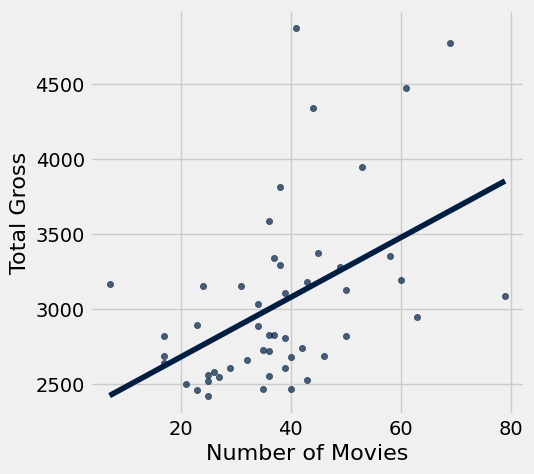

In [8]:
actors.scatter(column_for_x="Number of Movies", select="Total Gross", fit_line=True)

# overlay=False is meant for when there's more than 1 color. See join table

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4900,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4800,69,69.2,The Avengers,623.4
Morgan Freeman,4500,61,73.3,The Dark Knight,534.9


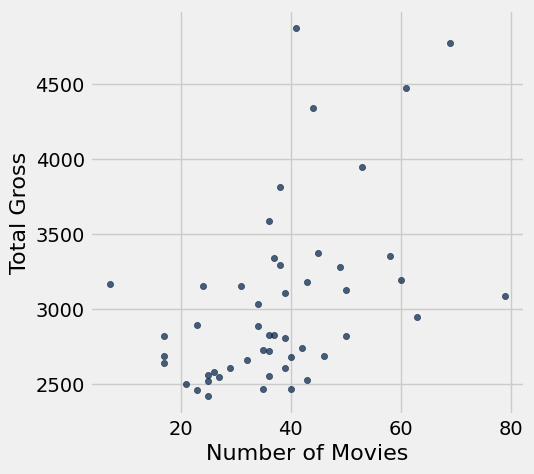

In [9]:
# Goal: Group and Scatter Plot by approx net gross
# 2 methods to create bins - one via graphs internal and one with a modified table

# Version 1
# approx_gross = actors.apply( round, "Total Gross") # This is an array 
# actors_approx_worth = actors.with_column(
#     "Total Gross", approx_gross
# )
# actors.show(3)
# actors_approx_worth.show(3)

# approx_gross_2 = actors.column("Total Gross")

# Version 2 
def hund_rounding(x):
    return 100 * round(x / 100, 0)
approx_gross = actors.apply( hund_rounding, "Total Gross") # This is an array 
actors_approx_worth = actors.with_column(
    "Total Gross", approx_gross
)
actors.show(3)
actors_approx_worth.show(3)

actors.scatter(column_for_x="Number of Movies", select="Total Gross")


In [10]:

# Version 2.2 Round Every Column
# Wait no I mixed up a lambda and a list comprehension
# array_of_cols = [lambda col: actors.apply(hund_rounding, col) for col in actors.labels]
# array_of_cols = [actors.apply(hund_rounding, col) for col in actors.labels]
# print(array_of_cols)



# numerical_labels = make_array() # usually just list() or np.ndarray or something
# for label in actors.labels:
#     # if actors.column(label)
#     # print(f"{label}: {actors.apply(is_number, label)}")
#     # print(f"{label}: {np.count_nonzero(actors.apply(is_number, label))}")
#     if (np.count_nonzero(actors.apply(is_number, label))):
#         # numerical_labels.append(label) # wait this is not a list that could be directly appended to
#         numerical_labels = np.append(numerical_labels, label)

# print(f"Numerical labels: {numerical_labels}")

def find_numerical_labels(table):
    def is_number(value):
        """
        Turns out this code is faulty on 
        <class 'numpy.int32'> 
        """
        # return isinstance(value, (int, float))
        return isinstance(value, (int, float, np.integer, np.floating))
        

    # Debugging lines:
    # print(actors.apply(is_number, "Number of Movies"))
    # sample_i  = actors.column("Number of Movies").item(3)
    # print(f"sample_i {sample_i} : {type(sample_i)} : {is_number(sample_i)}")
    # sample_arr = actors.apply(is_number, "Number of Movies")
    # print(sample_arr)
    
    # sample_col = actors.column("Number of Movies")
    # print(sample_col)
    

    numerical_labels = make_array() # usually just list() or np.ndarray or something
    for label in table.labels:
        # if actors.column(label)
        # print(f"{label}: {actors.apply(is_number, label)}")
        # print(f"{label}: {np.count_nonzero(actors.apply(is_number, label))}")
        if (np.count_nonzero(actors.apply(is_number, label))):
            # numerical_labels.append(label) # wait this is not a list that could be directly appended to
            numerical_labels = np.append(numerical_labels, label)

    # print(f"Numerical labels: {numerical_labels}")
    return numerical_labels

actor_numerical_labels = find_numerical_labels(actors)
print(actor_numerical_labels)

actors_copy = actors.copy() 
for n_m in actor_numerical_labels:
    transformed_array = actors_copy.apply(hund_rounding, n_m)
    actors_copy = actors_copy.with_column(n_m, transformed_array)
actors_copy.show(5)
# actors.scatter("Number Of Movies") 
 # ValueError: The column 'Actor' contains non-numerical values. A plot cannot be drawn for this column.
  # It selected 1st column
  
# Works:
# actors.scatter("Number of Movies", "Total Gross")
# actors.scatter(column_for_x="Number of Movies", select="Total Gross")



['Total Gross' 'Number of Movies' 'Average per Movie' 'Gross']


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4900,0,100,Star Wars: The Force Awakens,900
Samuel L. Jackson,4800,100,100,The Avengers,600
Morgan Freeman,4500,100,100,The Dark Knight,500
Tom Hanks,4300,0,100,Toy Story 3,400
"Robert Downey, Jr.",3900,100,100,The Avengers,600


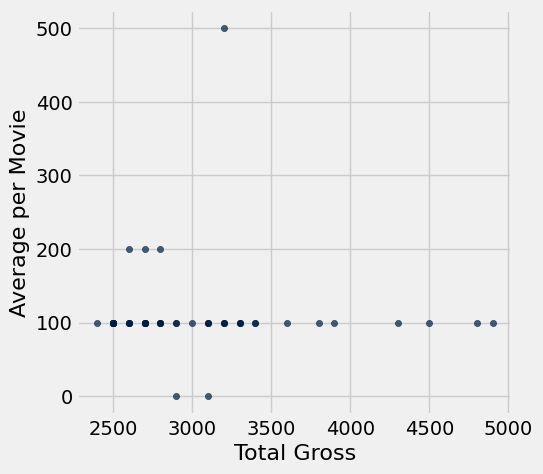

In [11]:
actors_copy.scatter(column_for_x=1, select=3)

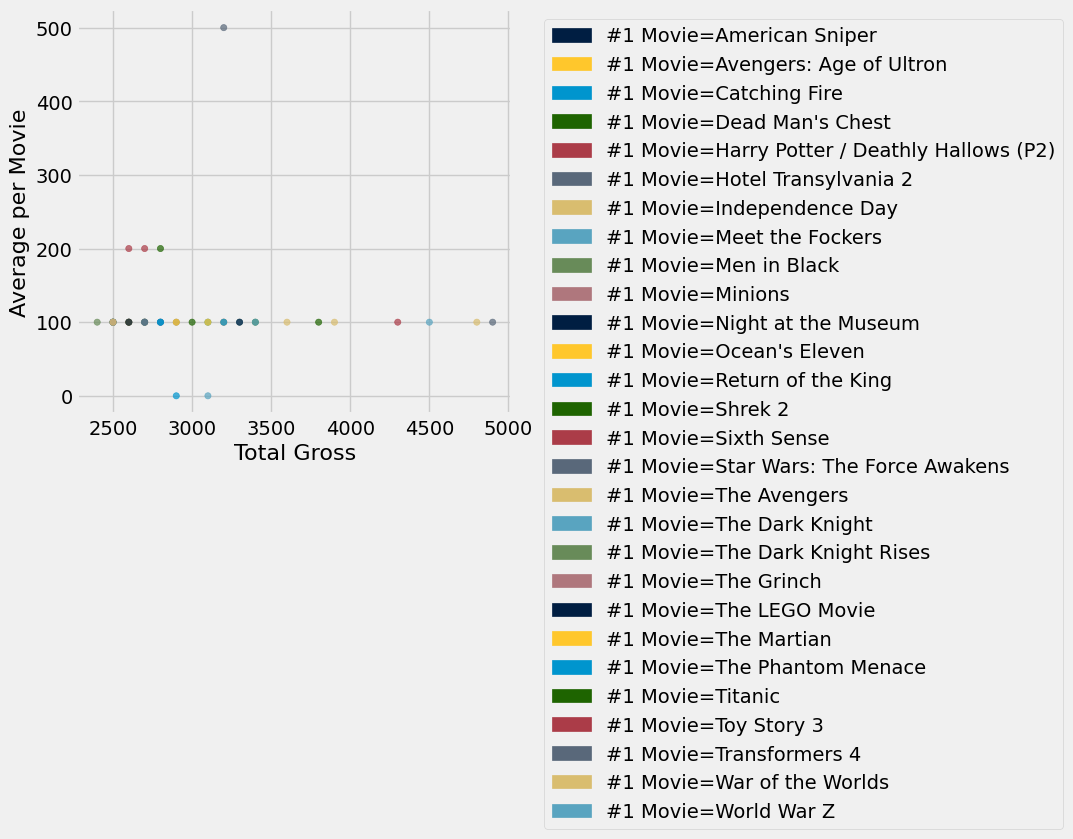

In [12]:
actors_copy.scatter(column_for_x=1, select=3, group=4) # group must be a y_label. Cannot reuse x_label.

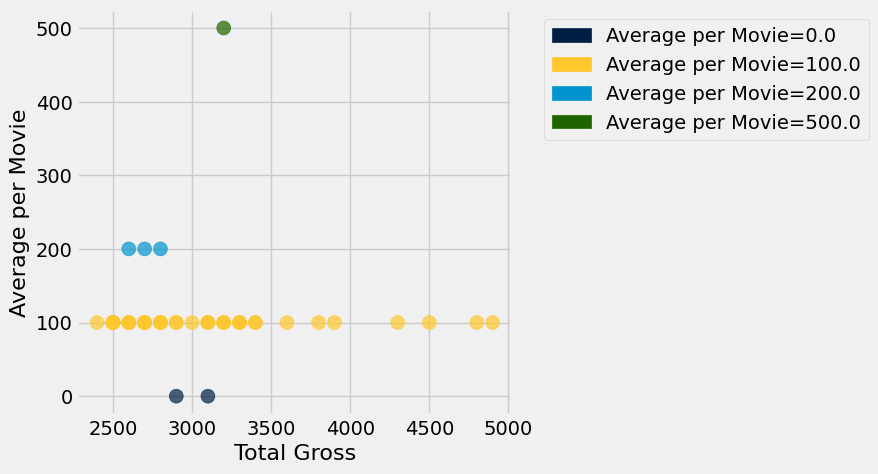

In [13]:
actors_copy.scatter(column_for_x=1, select=3, group=3, s=100) 

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross,variable_sizes
Harrison Ford,4900,0,100,Star Wars: The Force Awakens,900,0
Samuel L. Jackson,4800,100,100,The Avengers,600,10000000
Morgan Freeman,4500,100,100,The Dark Knight,500,20000000


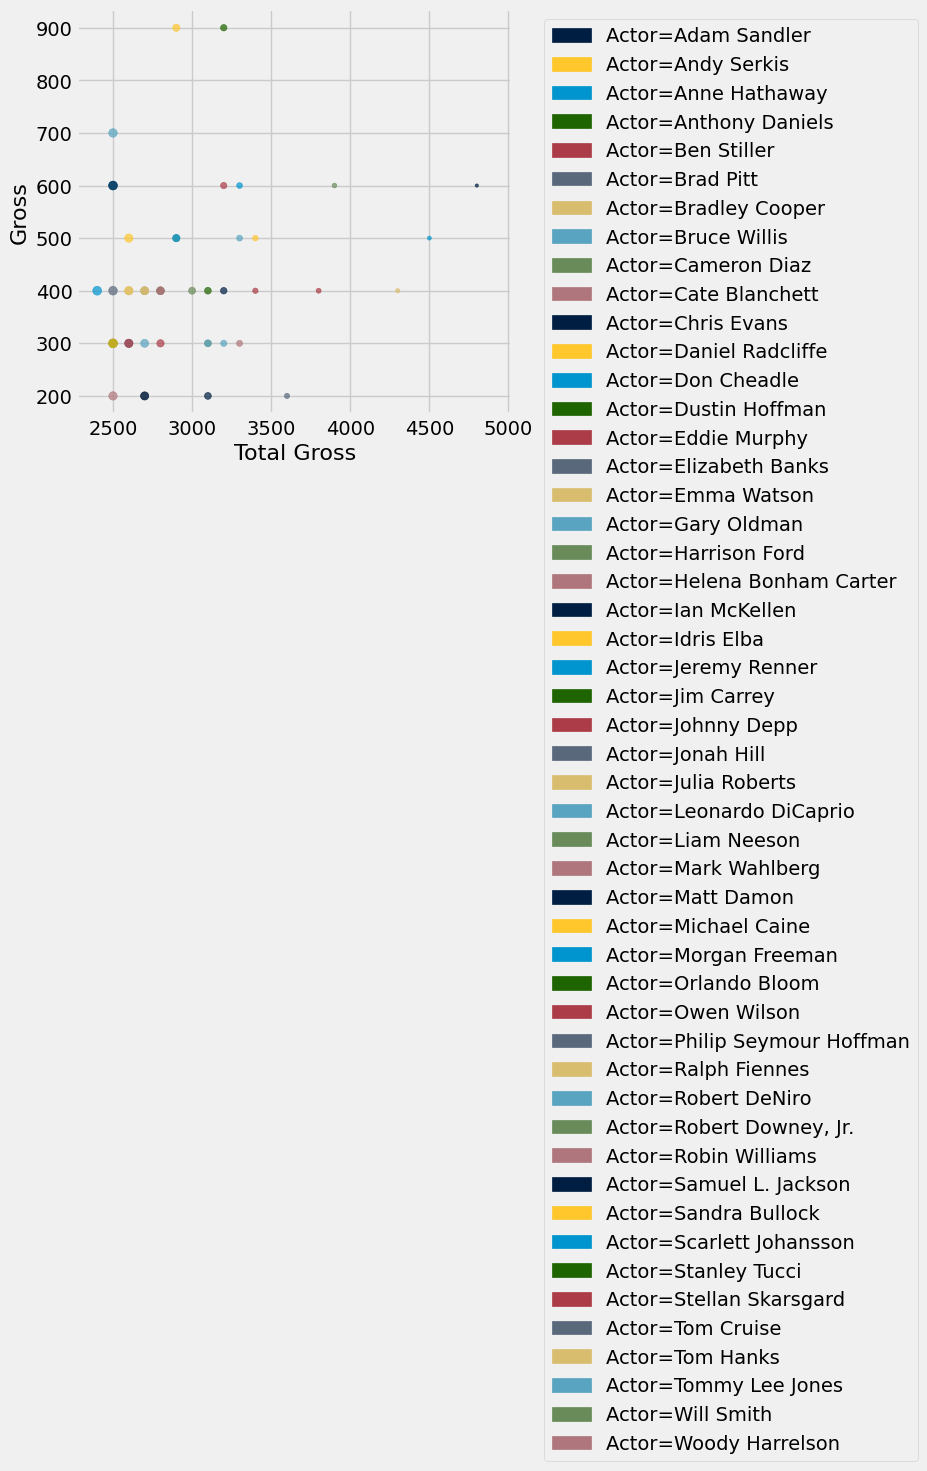

In [41]:
actors_copy.labels
actors_sized = actors_copy.with_column(
    "variable_sizes", np.arange(actors_copy.num_rows) * 10000000 # Array piecewise arith might be failing here. Moving on though.
)
actors_sized.show(3)
actors_sized.scatter(column_for_x="Total Gross", select="Gross", group="Actor", sizes="variable_sizes") # Not big enough 

# There's other visualization plot techniques to cover


In [ ]:

# Practicing retrieving the last rows - of no use on final though, it's on paper 
   # Time exceeded - moving on
"""
# temp_array = np.empty(3)
actors_last_rows = Table()
for from_back in np.arange(3):
    # temp_array[from_back] = actors_sized.row( actors_sized.num_rows - from_back - 1  )
    # print(type(actors_sized.row( actors_sized.num_rows - from_back - 1  ) )) # SO we would need to use list() or whatever np.ndarray equivalent - but we can give up on this as well
    actors_last_rows = actors_last_rows.with_row( list(actors_sized.num_rows - from_back - 1))
"""

# NEW SOLUTIONS

# You're supposed to use these methods
"""
print(bin_counts.last("Adjusted Gross count"))
bin_counts.sort("bin", descending=True).show(5)
"""

print()

## Outlier Filtration

In [ ]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

The negative association is still clearly visible. Let's identify the actors corresponding to the points that lie on the right hand side of the plot where the number of movies is large:

In [ ]:
actors.where('Number of Movies', are.above(60))

The great actor Robert DeNiro has the highest number of movies and the lowest average receipt per movie. Other fine actors are at points that are not very far away, but DeNiro's is at the extreme end.

To understand the negative association, note that the more movies an actor is in, the more variable those movies might be, in terms of style, genre, and box office draw. For example, an actor might be in some high-grossing action movies or comedies (such as Meet the Fockers), and also in a large number of smaller films that may be excellent but don't draw large crowds. Thus the actor's value of average receipts per movie might be relatively low.

To approach this argument from a different direction, let us now take a look at the outlier.

In [ ]:
actors.where('Number of Movies', are.below(10))

As an actor, Anthony Daniels might not have the stature of Robert DeNiro. But his 7 movies had an astonishingly high average receipt of nearly $452$ million dollars per movie.

What were these movies? You might know about the droid C-3PO in Star Wars:

![C-3PO](../../images/C-3PO_droid.png)

That's [Anthony Daniels](https://en.wikipedia.org/wiki/Anthony_Daniels) inside the metallic suit. He plays C-3PO.

Mr. Daniels' entire filmography (apart from cameos) consists of movies in the high-grossing Star Wars franchise. That explains both his high average receipt and his low number of movies.

Variables such as genre and production budget have an effect on the association between the number of movies and the average receipt per movie. This example is a reminder that studying the association between two variables often involves understanding other related variables as well. 

# <h2>Line Plots</h2>

Line plots, sometimes known as line graphs, are among the most common visualizations. They are often used to study chronological trends and patterns.

The table `movies_by_year` contains data on movies produced by U.S. studios in each of the years 1980 through 2015. The columns are:

| **Column** | Content |
|------------|---------|
| `Year` | Year |
| `Total Gross` | Total domestic box office gross, in millions of dollars, of all movies released |
| `Number of Movies` | Number of movies released |
| `#1 Movie` | Highest grossing movie |

In [ ]:
movies_by_year = Table.read_table(path_data + 'movies_by_year.csv')
movies_by_year

The Table method `plot` produces a line plot. Its two arguments are the same as those for `scatter`: first the column on the horizontal axis, then the column on the vertical. Here is a line plot of the number of movies released each year over the years 1980 through 2015.

In [ ]:
movies_by_year.plot('Year', 'Number of Movies')

The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year. The sharp rise in the early 1980's is due in part to studios returning to the forefront of movie production after some years of filmmaker driven movies in the 1970's. 

Our focus will be on more recent years. In keeping with the theme of movies, the table of rows corresponding to the years 2000 through 2015 have been assigned to the name `century_21`.

In [ ]:
century_21 = movies_by_year.where('Year', are.above(1999))

In [ ]:
century_21.plot('Year', 'Number of Movies')

The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn't suffer much.

In [ ]:
century_21.plot('Year', 'Total Gross')

The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession. ["In Downturn, Americans Flock to the Movies,"](http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0) said the New York Times in February 2009. The article quotes Martin Kaplan of the University of Southern California saying, "People want to forget their troubles, and they want to be with other people." When holidays and expensive treats are unaffordable, movies provide welcome entertainment and relief.

In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the \#1 movie of 2009, it is also by some calculations one of the highest grossing movies of all time, as we will see later.

In [ ]:
century_21.where('Year', are.equal_to(2009))